# 2 Etude et résolution numérique

1. Le problème étudié est le suivant : 
$$ {min}_{P, T^{i}} \Delta \sum_{k=1}^N{c}_k P_k $$
s.c.
$$ 0 \leq P_k \leq P_{max,k} - \forall k $$ 
$$  T^{i}_{min,k} \leq T^{i}_k \leq T^{i}_{max,k} - \forall k$$
$$ T_{k+1}^{i} = f_{k}(T_{k}^{i},p,P) - \forall k$$

Avec $$f(T_k^i, p) = T^i_k + \dfrac{p_1 \,\Delta }{c_{air}} (p_2 (T^e_k - T^i_k) + p_3 \Phi_s^k + \nu P_k)$$

On voit la qu'il s'agit d'un problème convexe, toutes les fonctions du problème sont linéraires et donc convexe. La convexité et l'aspect borné des solutions permet d'affirmer, à l'aide des théorèmes du cours, l'existence d'une solution à ce problème. On peut cependant pas prouver l'unicité de cette solution. Il y a donc au moins une solution au problème de minimisation posé. Comme dit précédemment, il s'agit là d'un problème d'optimisation linéaire de la forme :

$$ {min}_{X} <V.X> $$
s.c.
$$ AX = B $$
$$  X\geq 0$$

Aucun algorithme vu dans le cours ne permet de résoudre des problèmes d'optimisation linéaire. Cependant, nous avons vu en TD la méthode du "simplex" qui permet de résoudre ce genre de problème. Il suffit pour cela de réexprimer les diférentes contraintes d'une autre facon en ajoutant des variables d'écart.




Ainsi on transforme les différentes inégalités en :
$$T^{i}_{min,k} - T^{i}_{k} + \alpha_k = 0-\forall k$$
$$ T^{i}_{k} -T^{i}_{max,k} + \beta_k = 0-\forall k$$
$$P_k -P_{max,k} + \gamma_k=0-\forall k$$
Soit,  $$  \alpha,\beta,\gamma \geq 0$$
Cependant, cette méthode est déjà implémenter dans le module scipy de python à travers la fonction optimize.linprog. Ainsi il n'est pas nécessaire de mettre les contraintes sous une forme particulière. Il suffit de d'exprimer les équations sous la forme :$$AX=B$$
et indiquer par la suite les bornes à la fonction (Tmin,Tmax et Pmax). Pour cela on pose$$ X = \begin{pmatrix} P \\ T \end{pmatrix}$$

In [38]:
from math import *
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'température _ext')

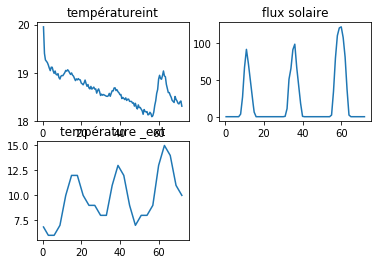

In [61]:
# Extraction des données
data = np.loadtxt('donnees-projet-gr4.txt')
heure = data.transpose()[0]
T_int = data.transpose()[1]
phi_sol = data.transpose()[2]
T_ext = data.transpose()[3]
plt.subplot((221))
plt.plot(heure,T_int)
plt.title('températureint')
plt.subplot((222))
plt.plot(heure,phi_sol)
plt.title('flux solaire')
plt.subplot(223)
plt.plot(heure,T_ext)
plt.title('température _ext')


In [71]:
#température extérieure constante

prix_watt = 0.00001
n=143
p1 = 0.057473
p2 = 10
p3 = 0.006433
nu = 0.9
delta = 1800
c_air = 1256
temp_min = 19+273
temp_max = 21+273
puissance_max = 1500
a1 = (delta*p1)/c_air
C = np.zeros(2*(n+1)-1)
Te = np.zeros(n+1)
Timin = np.full(n+1,temp_min)
Timax = np.full(n+1,temp_max)
Pmax = np.full(n+1,puissance_max)
Fluxsolaire = np.zeros(n+1)
Temp_ext = np.zeros(n+1)
boundmin = np.zeros(2*n+2)
boundmax = np.zeros(2*n+2)
bounds = []
for i in range(n+1):
    boundmin[n+1+i] = Timin[i]
    boundmax[i] = Pmax[i]
    boundmax[n+1+i] = Timax[i]
for i in range(len(boundmax)-1):
    bounds.append((boundmin[i],boundmax[i]))
for m in range(n+1):
    Fluxsolaire[m] = phi_sol[m]
    Temp_ext[m] = 0+273
for loop in range(n+1):
    C[loop] = prix_watt
A = np.zeros([n,2*(n+1)-1])
for i in range (n):
    A[i,i+n] = a1*p2-1
    A[i,i+n+1] = 1.0
    A[i,i] = -(nu*a1)
B=np.zeros(n)
A[0,n] = 0.0
for k in range(n):
    B[k] = a1*p2*Temp_ext[k] + a1*p3*Fluxsolaire[k]
B[0] = B[0] + (1-a1*p2)*285
res = optimize.linprog(C, A_ub=None, b_ub=None, A_eq=A, b_eq=B, bounds=bounds, method='simplex', callback=None, options=None, x0=None)
prix1 = delta*res.fun
print("* Le cout minimum est : %.3f euros" % prix1)

* Le cout minimum est : 543.316 euros


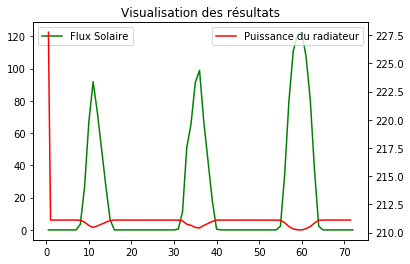

In [72]:
P1 = res.x[0:n+1]
T1 = res.x[n+1:]
T_final1 = [285]
for loop in range(0,n):
    T_final1.append(T[loop])
fig, ax1 = plt.subplots()
ax2 = plt.gca().twinx()
ax2.plot(heure[0:n],P1[0:n], label = "Puissance du radiateur" ,color = "red")
#ax1.plot(heure,T,label = 'Modèle')
ax1.plot(heure,phi_sol, label = "Flux Solaire",color="green")

ax1.legend()
ax2.legend()
plt.title('Visualisation des résultats')
plt.show()


On peut voir ici que la puissance des radiateurs est sensible au flux solaire. Dans ce cas on a choisi une température extérieure contante inférieure à l'intervalle de température de comfort.

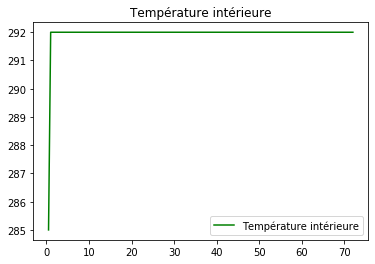

In [64]:
fig, ax1 = plt.subplots()

ax1.plot(heure,T_final1, label = "Température intérieure",color="green")

ax1.legend()
plt.title('Température intérieure')
plt.show()

On a choisi comme borne de température intérieure 19°C et 21°C. On remarque donc que pour minimiser les couts, il faut maintenir la température à la borne inférieure. 

In [69]:
#température extérieure variable
prix_watt = 0.00001
n=143
p1 = 0.057473
p2 = 10
p3 = 0.006433
nu = 0.9
delta = 1800
c_air = 1256
temp_min = 19+273
temp_max = 21+273
puissance_max = 1500
a1 = (delta*p1)/c_air
C = np.zeros(2*(n+1)-1)
Te = np.zeros(n+1)
Timin = np.full(n+1,temp_min)
Timax = np.full(n+1,temp_max)
Pmax = np.full(n+1,puissance_max)
Fluxsolaire = np.zeros(n+1)
Temp_ext2 = np.zeros(n+1)
boundmin = np.zeros(2*n+2)
boundmax = np.zeros(2*n+2)
bounds = []
for i in range(n+1):
    boundmin[n+1+i] = Timin[i]
    boundmax[i] = Pmax[i]
    boundmax[n+1+i] = Timax[i]
for i in range(len(boundmax)-1):
    bounds.append((boundmin[i],boundmax[i]))
for m in range(n+1):
    Fluxsolaire[m] = phi_sol[m]
for x in range (0,n+1):
    if x == 16:
        temperature = 285
    elif x == 40:
        temperature = 273
    elif x == 64:
        temperature = 285
    elif x == 88:
        temperature = 273
    elif x == 112:
        temperature =285
    elif x == 136:
        temperature = 273
    elif x==0:
        temperature = 273
        
    Temp_ext2[x] = temperature

for loop in range(n+1):
    C[loop] = prix_watt
A = np.zeros([n,2*(n+1)-1])
for i in range (n):
    A[i,i+n] = a1*p2-1
    A[i,i+n+1] = 1.0
    A[i,i] = -(nu*a1)
B=np.zeros(n)
A[0,n] = 0.0
for k in range(n):
    B[k] = a1*p2*Temp_ext2[k] + a1*p3*Fluxsolaire[k]
B[0] = B[0] + (1-a1*p2)*285
res2 = optimize.linprog(C, A_ub=None, b_ub=None, A_eq=A, b_eq=B, bounds=bounds, method='simplex', callback=None, options=None, x0=None)

prix2 = delta*res2.fun
print("* Le cout minimum est : %.3f euros" % prix2)

* Le cout minimum est : 370.516 euros


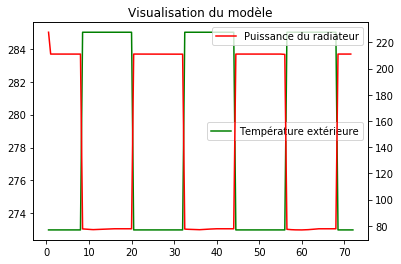

In [66]:
P2 = res2.x[0:n+1]
T2 = res2.x[n+1:]
T_final2 = [285]
for loop in range(0,n):
    T_final2.append(T[loop])

fig, ax1 = plt.subplots()
ax2 = plt.gca().twinx()
ax2.plot(heure[0:n],P2[0:n], label = "Puissance du radiateur" ,color = "red")
#ax1.plot(heure,T,label = 'Modèle')
ax1.plot(heure,Temp_ext2, label = "Température extérieure",color="green")

ax1.legend()
ax2.legend()
plt.title('Visualisation du modèle')
plt.show()

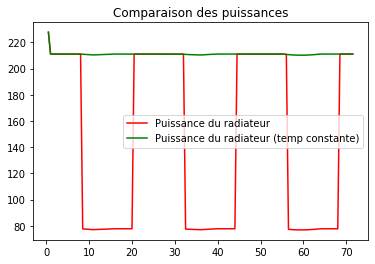

In [67]:
fig, ax1 = plt.subplots()
ax1.plot(heure[0:n],P2[0:n], label = "Puissance du radiateur " ,color = "red")
#ax1.plot(heure,T,label = 'Modèle')
ax1.plot(heure[0:n],P1[0:n], label = "Puissance du radiateur (temp constante)",color="green")
ax1.legend()
plt.title('Comparaison des puissances')
plt.show()

Lorsqu'on fixe une température extérieure variante, on remarque l'apparition de paliers mais la courbe sur ces paliers est la même que celle pour la température constante. On remarque également que l'on paie plus dans le cas constant ce qui parait logique car on peut utiliser l'énergie apportée par la température extérieure dans le cas variable.